In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten
from keras.optimizers import RMSprop
from keras import regularizers
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from keras import regularizers
from numpy import linalg as LA
from joblib import Parallel,delayed

#Initial the weight of the network
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
set_random_seed(2)

Using TensorFlow backend.


In [32]:
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

N = 80000
data = shuffle(data, random_state = 0)
data = data.iloc[:N, :]
data.head()

,ID,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status
7389,14041388,GTM5525,NY,PAS,8611661801,7/17/2018,02:33P,INSP. STICKER-EXPIRED/MISSING,12/27/2018,65,60,2.92,0.0,0.0,127.92,84,K,TRAFFIC,HEARING HELD-GUILTY
3509,19126160,HCE9058,NY,PAS,1410180359,5/12/2016,09:42A,NO PARKING-STREET CLEANING,NaN,45,30,0.00,0.0,75.0,0.00,115,Q,DEPARTMENT OF SANITATION,HEARING HELD-GUILTY
30661,20195251,AS277N,NJ,PAS,8485188421,6/16/2017,06:16A,DOUBLE PARKING,NaN,115,0,0.00,115.0,0.0,0.00,13,NY,TRAFFIC,HEARING HELD-NOT GUILTY
63191,25336035,89781JY,NY,COM,8616644714,10/31/2018,01:37P,FAIL TO DISP. MUNI METER RECPT,NaN,65,0,0.00,0.0,65.0,0.00,13,NY,TRAFFIC,HEARING HELD-GUILTY
38241,16321837,48767JZ,NY,COM,8080531389,6/17/2016,11:02A,NO STANDING-DAY/TIME LIMITS,NaN,115,0,0.00,23.0,92.0,0.00,23,NY,TRAFFIC,HEARING HELD-GUILTY REDUCTION


In [33]:
col1 = data.columns
data["Pre_county"] = data["Precinct"].map(str) + data["County"]
test_data["Pre_county"] = test_data["Precinct"].map(str) + test_data["County"]

col2 = data.columns
# print("len col1 {}, len of col2 {}".format(len(col1), len(col2)))
test_data.head()
# pre_county = test_data["Pre_county"].unique()
print("len of pre_county {}, {}".format(len(test_data["Pre_county"].unique()),len(data["Pre_county"].unique())))

len of pre_county 182, 132


In [34]:


status = data["Violation Status"].unique()
license_type = list(set(test_data["License Type"].unique()) | set(data["License Type"].unique()))
violation = list(set(test_data["Violation"].unique()) | set(data["Violation"].unique()))
county = list(set(test_data["County"].unique()) | set(data["County"].unique()))
issu_agency = list(set(test_data["Issuing Agency"].unique()) | set(data["Issuing Agency"].unique()))
state = list(set(test_data["State"].unique()) | set(data["State"].unique()))
pre_county = list(set(test_data["Pre_county"].unique()) | set(data["Pre_county"].unique()))
data.head(10)
print(len(pre_county))
      
# print("len of county {}, len of precinct {}".format(len(county),len(data["Precinct"].unique())))

# status_tst = test_data["Violation Status"].unique()
# license_type = test_data["License Type"].unique()
# violation = test_data["Violation"].unique()
# county = test_data["County"].unique()
# issu_agency = test_data["Issuing Agency"].unique()
# state = test_data["State"].unique()

313


In [35]:
# for i in range(len(status)):
#     data["Violation Status"].replace(status[i],i,inplace=True)
    
# for i in range(len(license_type)):
#     data["License Type"].replace(license_type[i],i,inplace=True)
    
# for i in range(len(violation)):
#     data["Violation"].replace(violation[i],i,inplace=True)

# for i in range(len(county)):
#     data["County"].replace(county[i],i,inplace=True)
    
# for i in range(len(issu_agency)):
#     data["Issuing Agency"].replace(issu_agency[i],i,inplace=True)
    
# for i in range(len(state)):
#     data["State"].replace(state[i],i,inplace=True)
    
# for i in range(len(pre_county)):
#     data["Pre_county"].replace(pre_county[i],i,inplace=True)

Text(0.5, 1.0, 'distance error histogram range')

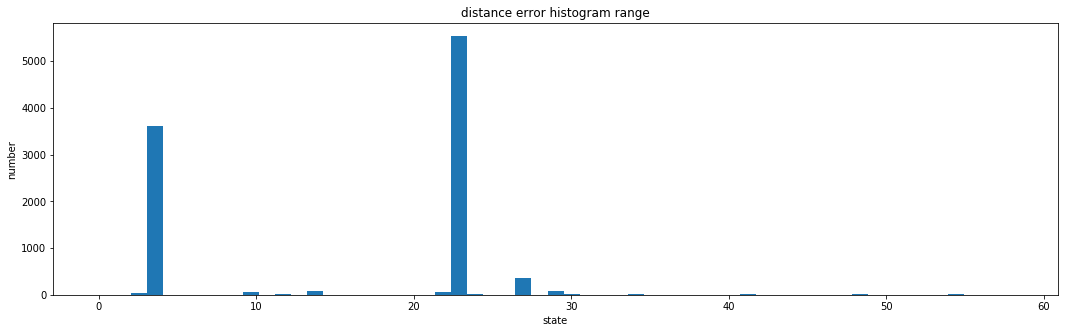

In [4]:
#plot the 2D image of error
plt.figure(figsize=(18,5))
# plt.subplot(1,3,1)
n = len(license_type)
plt.hist(data["License Type"],n , range = [0, n + 1])
plt.xlabel("state")
plt.ylabel("number")
plt.title("distance error histogram range")

In [36]:
# print("len(status) = ", len(status))
# print("license_type = ", len(license_type))
# print(status)
        
for i in range(len(status)):
    data["Violation Status"].replace(status[i],i,inplace=True)
    
for i in range(len(license_type)):
    data["License Type"].replace(license_type[i],i,inplace=True)
    
for i in range(len(violation)):
    data["Violation"].replace(violation[i],i,inplace=True)

for i in range(len(county)):
    data["County"].replace(county[i],i,inplace=True)
    
for i in range(len(issu_agency)):
    data["Issuing Agency"].replace(issu_agency[i],i,inplace=True)
    
for i in range(len(state)):
    data["State"].replace(state[i],i,inplace=True)
    
for i in range(len(pre_county)):
    data["Pre_county"].replace(pre_county[i],i,inplace=True)

data.drop(labels=None,axis=1, index=None, columns="Plate", inplace=True)
data.drop(labels=None,axis=1, index=None, columns="Summons Number", inplace=True)
data.drop(labels=None,axis=1, index=None, columns="Issue Date", inplace=True)
data.drop(labels=None,axis=1, index=None, columns="Violation Time", inplace=True)
data.drop(labels=None,axis=1, index=None, columns="Judgment Entry Date", inplace=True)
data.drop(labels=None,axis=1, index=None, columns="ID", inplace=True)

# data.head(10)

print(data.shape)

(80000, 14)


In [37]:
for i in range(len(license_type)):
    test_data["License Type"].replace(license_type[i],i,inplace=True)
    
for i in range(len(violation)):
    test_data["Violation"].replace(violation[i],i,inplace=True)

for i in range(len(county)):
    test_data["County"].replace(county[i],i,inplace=True)
    
for i in range(len(issu_agency)):
    test_data["Issuing Agency"].replace(issu_agency[i],i,inplace=True)
    
for i in range(len(state)):
    test_data["State"].replace(state[i],i,inplace=True)
    
for i in range(len(pre_county)):
    test_data["Pre_county"].replace(pre_county[i],i,inplace=True)
    
test_data.drop(labels=None,axis=1, index=None, columns="Plate", inplace=True)
test_data.drop(labels=None,axis=1, index=None, columns="Summons Number", inplace=True)
test_data.drop(labels=None,axis=1, index=None, columns="Issue Date", inplace=True)
test_data.drop(labels=None,axis=1, index=None, columns="Violation Time", inplace=True)
test_data.drop(labels=None,axis=1, index=None, columns="Judgment Entry Date", inplace=True)
test_data.drop(labels=None,axis=1, index=None, columns="ID", inplace=True)

X_tst_final = test_data.iloc[:, :]
print(X_tst_final.shape)

(200000, 13)


In [38]:
data.head()

,State,License Type,Violation,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Pre_county
7389,38,12,61,65,60,2.92,0.0,0.0,127.92,84,6,13,0,128
3509,38,12,9,45,30,0.00,0.0,75.0,0.00,115,7,8,0,72
30661,24,12,18,115,0,0.00,115.0,0.0,0.00,13,2,13,1,122
63191,38,5,20,65,0,0.00,0.0,65.0,0.00,13,2,13,0,122
38241,38,5,67,115,0,0.00,23.0,92.0,0.00,23,2,13,2,242


In [43]:
print("len(data.columns)", len(data.columns))
X = data.iloc[:, :-2]
y = data.iloc[:, -2:-1]
X["pre_county"] = data.iloc[:, -1:]
le = LabelEncoder()
y = le.fit_transform(y)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, random_state=42)
print("len(X_trn.columns)", len(X_trn.columns))
X_trn.head(10)

len(data.columns) 14
len(X_trn.columns) 13


D:\Softwares\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,State,License Type,Violation,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,pre_county
25675,19,12,45,115,0,0.00,0.00,115.00,0.0,1,2,13,278
61050,38,12,27,115,0,0.00,0.00,115.00,0.0,106,7,13,160
46089,38,12,24,65,10,0.00,3.99,71.01,0.0,66,6,13,7
2662,7,12,1,65,0,0.00,0.00,0.00,65.0,1,2,13,278
45637,38,12,45,115,60,0.99,0.04,175.95,0.0,44,5,13,264
61263,38,5,67,115,0,0.00,23.00,92.00,0.0,14,2,13,140
63350,38,12,9,45,0,0.00,0.00,45.00,0.0,61,6,8,113
53748,38,5,18,115,0,0.00,50.00,65.00,0.0,75,6,13,274
49136,38,5,57,65,0,0.00,0.00,0.00,65.0,1,2,13,278
15517,38,37,1,65,0,0.00,0.00,65.00,0.0,17,2,13,309


In [44]:
print("X_trn.shape = ",X_trn.shape)

X_trn.shape =  (56000, 13)


In [ ]:
#Build the model
model = keras.Sequential()

model.add(keras.layers.normalization.BatchNormalization())
model.add(Dense(11, activation = 'tanh')) #tanh, relu

# model.add(Dense(8, activation = 'tanh')) #tanh, relu

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer


In [ ]:
#Compilation
def huber_loss(y_true, y_pred):
    return tf.losses.huber_loss(y_true,y_pred)

loss_func = "mean_squared_error"   #   categorical_crossentropy(bad)   mean_squared_error  huber_loss
opt_func = keras.optimizers.Adam(lr=0.001) #'Adam'  lr=0.001  #  RMSprop() sgd()  Adadelta()   Adam  nadam
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto', baseline=None)]

model.compile(loss = loss_func, 
              optimizer = opt_func
             )

# print(impulses_train.shape, location_train.shape)

In [ ]:
#Train the model, iterating
# print(impulses_train.shape, location_train.shape)
# print(impulses_test.shape, location_test.shape)

history = model.fit(impulses_train, location_train,
                    batch_size = 30, # 50 -> 52138; 20->52088
                    epochs = 100,
                    verbose = 0,
                    callbacks=callbacks,
                    validation_split = 0.2 #0.2,
#                     validation_data=(impulses_test,location_test)
                   )

In [ ]:
loc_prediction = model.predict(impulses_test)
loss[i] = model.evaluate(impulses_test, location_test,verbose=0)
#***************************************************************************************************
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min[i] = np.min(err_dis)
err_max[i] = np.max(err_dis)
err_avg[i] = np.mean(err_dis)
err_var[i] = np.var(err_dis)
print("mean error", err_avg[i])

In [ ]:
# ##SVM
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# d = [1,2,3,4]
# acc_tst = np.zeros(len(d))
# acc_trn = np.zeros(len(d))
   
# for i in range(len(d)):
#     clf = SVC(kernel='poly',degree=d[i],gamma='auto').fit(X_trn, y_trn)
#     y_tst_pre = clf.predict(X_tst)
#     acc_tst[i] = accuracy_score(y_tst_pre, y_tst)
#     y_trn_pre = clf.predict(X_trn)
#     acc_trn[i] = accuracy_score(y_trn_pre, y_trn)
# plt.plot(acc_trn,'r', marker = 'o', label = 'Err_Train')
# plt.plot(acc_tst,'b', marker = 'x', label = 'Err_Test')
# print(acc_tst)
# # print("acc_tst", acc_tst)
# # print("acc_trn", acc_trn)

In [51]:
# ##Bagging and Forest Tree
# from sklearn.ensemble import BaggingClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier

# clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 5), 
#                          n_estimators  = 4)
# model = clf.fit(X_trn, y_trn)
# y_pre_tst = clf.predict(X_tst)
# y_pre_trn = clf.predict(X_trn)
# Err_Train = accuracy_score(y_pre_trn, y_trn)
# Err_Test = accuracy_score(y_pre_tst, y_tst)


# # para = [3,4,5,6,7,8,9,10,15,20,25,30]
# # Err_Train = np.zeros(len(para))
# # Err_Test = np.zeros(len(para))
# # for i in range(len(para)):
# #     clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", max_depth = 5), 
# #                          n_estimators  = para[i])
# # # AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", max_depth = max_dep[i]), 
# # #                              n_estimators  = 15)
# #     model = clf.fit(X_trn, y_trn)
# #     y_pre_tst = clf.predict(X_tst)
# #     y_pre_trn = clf.predict(X_trn)
# #     Err_Train[i] = accuracy_score(y_pre_trn, y_trn)
# #     Err_Test[i] = accuracy_score(y_pre_tst, y_tst)
    
# # plt.plot(para,Err_Train,'r', marker = 'o', label = 'Err_Train')
# # plt.plot(para,Err_Test,'b', marker = 'x', label = 'Err_Test')
# print(Err_Test)
# print(Err_Train)

0.8675
0.8702321428571429


In [50]:
print(np.max(Err_Test))
print(np.argmax(Err_Test))

0.8692083333333334
4


In [52]:
#Write data to file
y_pre_tst_final = clf.predict(X_tst_final)
test_data_final = pd.read_csv('./data/test.csv')
df_sub = pd.DataFrame({'ID':test_data_final["ID"],'Prediction':y_pre_tst_final})
for i in range(len(status)):
    df_sub["Prediction"].replace(i,status[i],inplace=True)
df_sub.to_csv("./data/sub3.csv",index=False,sep=',')